### Problem Statement : Create an ML model that can Predict the insurance charges of the new clients. ---  Project

#### Importing libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_palette("deep") 

#### Get Data


In [47]:
df=pd.read_csv('new_insurance_data.csv')
df.head(2)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066


### EDA

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [49]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [50]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
df[df.isnull().any(axis=1)].head(2)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
5,18.0,male,34.43,0.0,no,26488.339120,20.0,717162.0,3696160.701,0.0,NaN,southeast,1137.4697
8,18.0,male,43.01,0.0,no,9715.650411,17.0,NaN,9216440.479,0.0,58881971.93,southeast,1149.3959


In [53]:
df.dropna(inplace=True)
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

<Axes: >

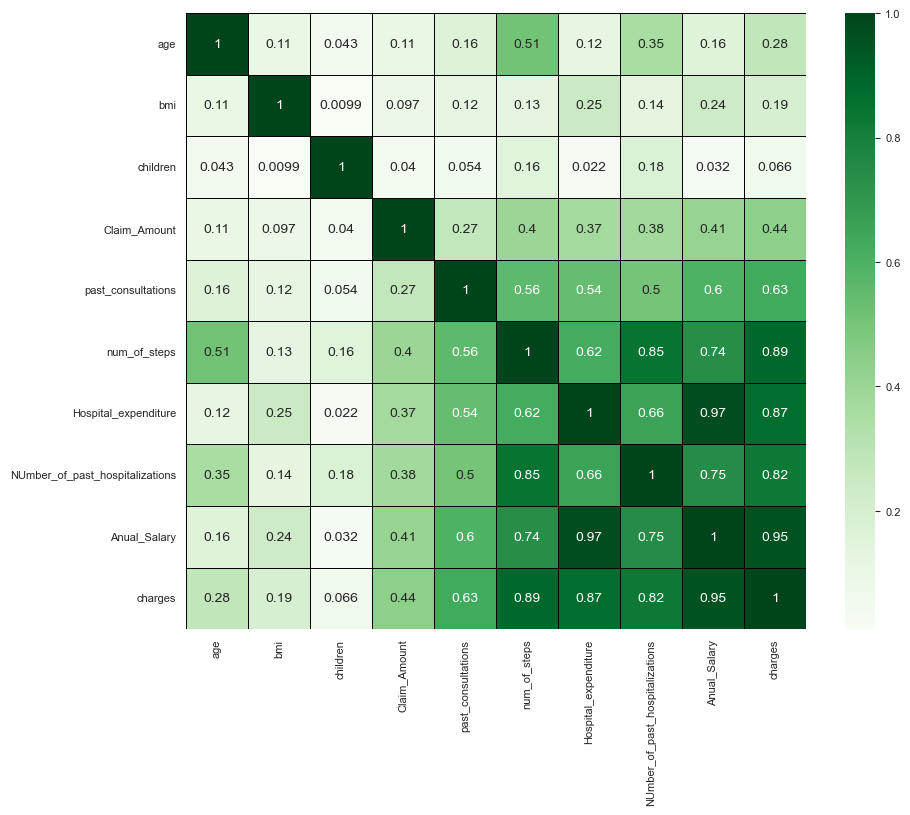

In [54]:
plt.figure(figsize=(10,8))
num_df=df.select_dtypes(include='number')
sns.heatmap(num_df.corr(),annot=True,cmap='Greens',linewidths=0.5, linecolor='black')

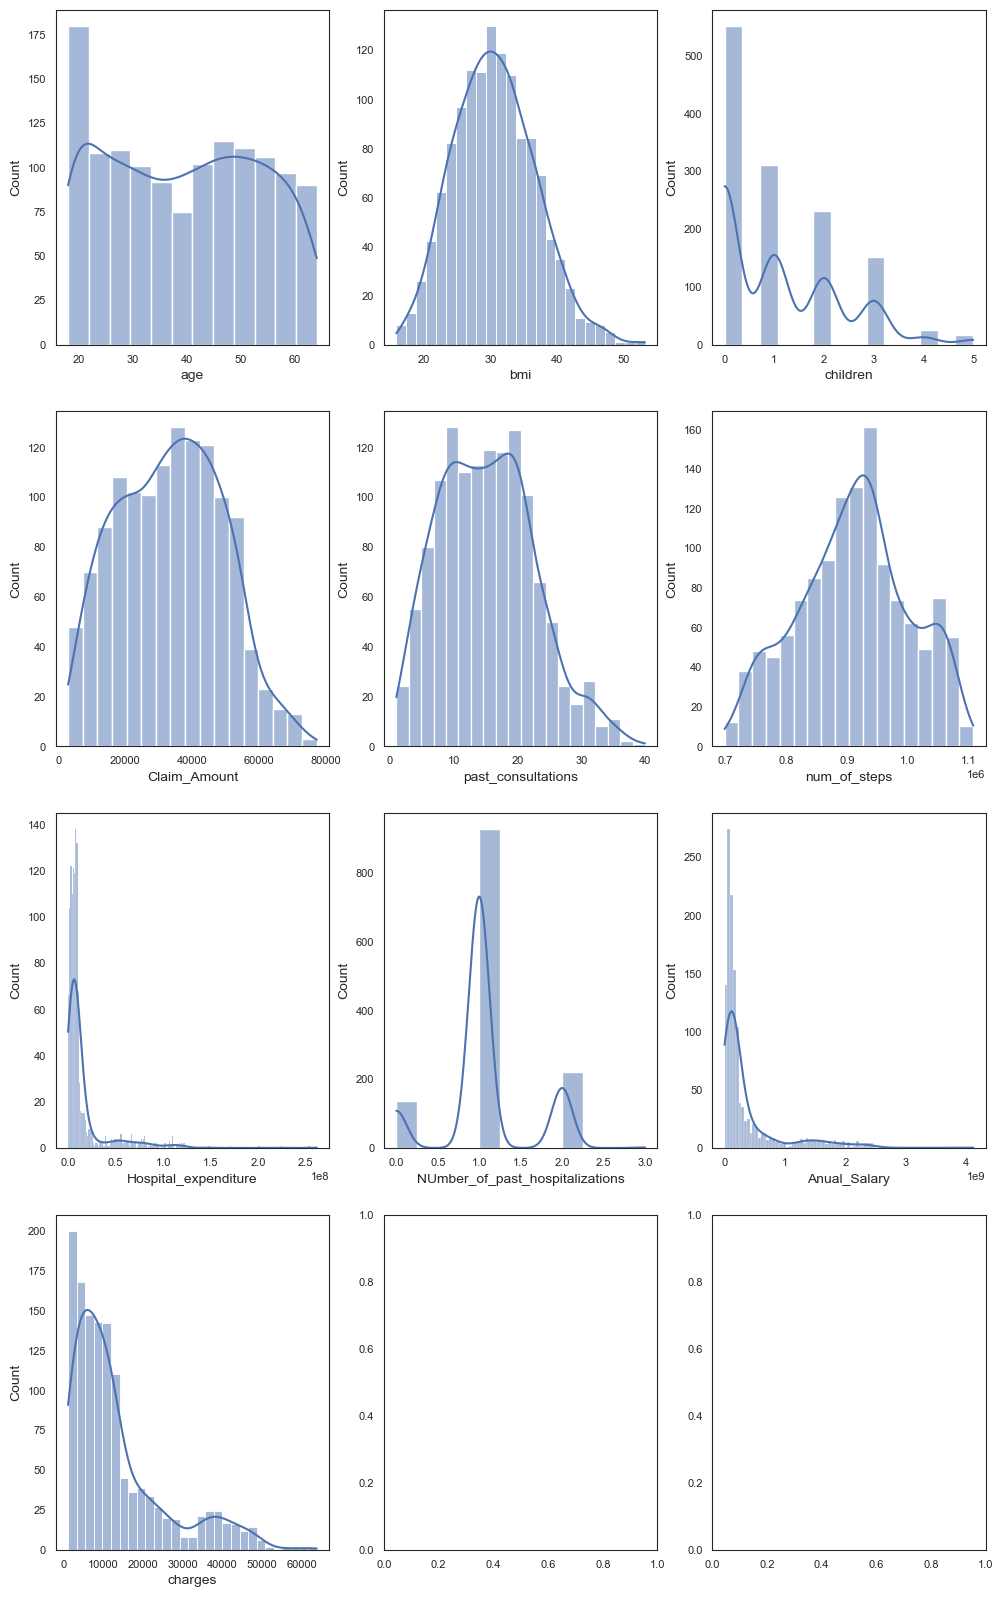

In [55]:
numeric_cols=df.select_dtypes(include=['number']).columns
num_cols=len(numeric_cols)

ncols=3
nrows=(num_cols+ncols-1)//ncols

fig,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols*4,nrows*5))
ax=ax.flatten()

for i,col in enumerate(numeric_cols):
    sns.histplot(df[col],kde=True,ax=ax[i])



**If we look at the *charges plot* the charges varies from 1120 to 63500, the plot is right skewed.In this case, the mean 13366.07 is larger than the median 9549.5651**

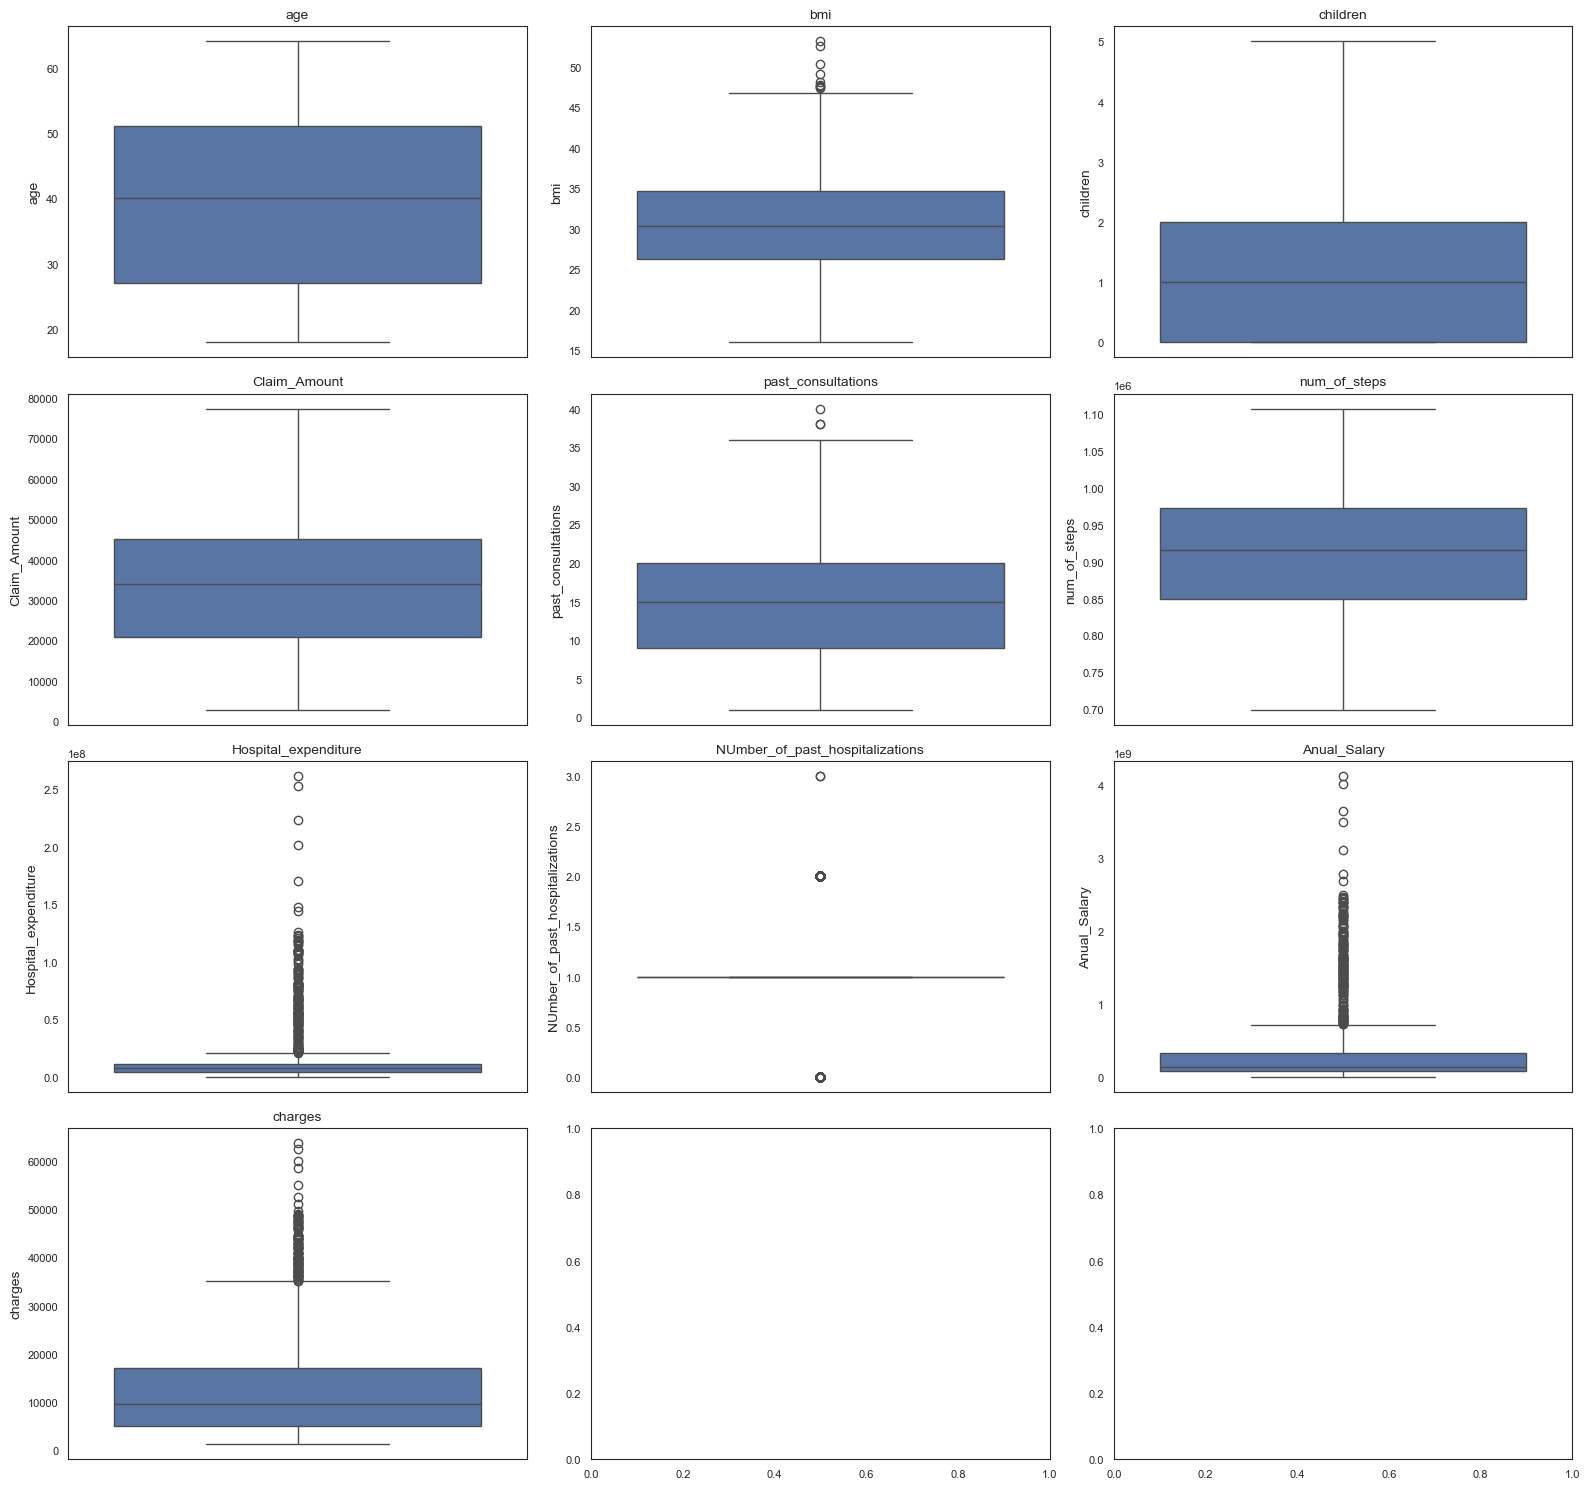

In [56]:
#outleirs

plt.rc('font', size=10)  
plt.rc('axes', titlesize=10)  
plt.rc('axes', labelsize=10)  
plt.rc('xtick', labelsize=8)  
plt.rc('ytick', labelsize=8)

numeric_cols=df.select_dtypes(include=['number']).columns
num_cols=len(numeric_cols)

ncols=3
nrows=(num_cols+ncols-1)//ncols

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(nrows*4,ncols*5))
axes=axes.flatten()

for ax,col in zip(axes,numeric_cols):
    sns.boxplot(y=df[col],ax=ax)
    ax.set_title(col)



plt.tight_layout()

**outlier_columns='bmi', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary', 'charges'**

In [57]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

**<span style="font-size:15px">1.5 is a rule of thumb </span>** that works well for many datasets, making it a standard in statistics. It is large enough to capture most of the data while excluding extreme values (outliers).
Data points outside this range are considered mild outliers. Increasing the multiplier (e.g., 3) would define extreme outliers.
In essence, 1.5 times the IQR is used to find a reasonable boundary for what can be considered unusual or anomalous data points (outliers) based on the spread of most of the data.

In [58]:
df['NUmber_of_past_hospitalizations'].value_counts()

NUmber_of_past_hospitalizations
1.0    927
2.0    221
0.0    137
3.0      2
Name: count, dtype: int64

#### Applying IQR method

In [59]:
outlier_cols=['bmi','past_consultations','Hospital_expenditure','Anual_Salary','charges']

for col in outlier_cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    
    iqr=q3-q1
    lower_limit=q1-(iqr*1.5)
    upper_limit=q3+(iqr*1.5)
    
    df=df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]
    
df
    
    

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,male,20.13,2.0,yes,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,southeast,18767.73770
1041,24.0,female,27.60,0.0,no,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,southwest,18955.22017
1046,29.0,female,27.94,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.90,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400


#### Outleirs check after IQR method

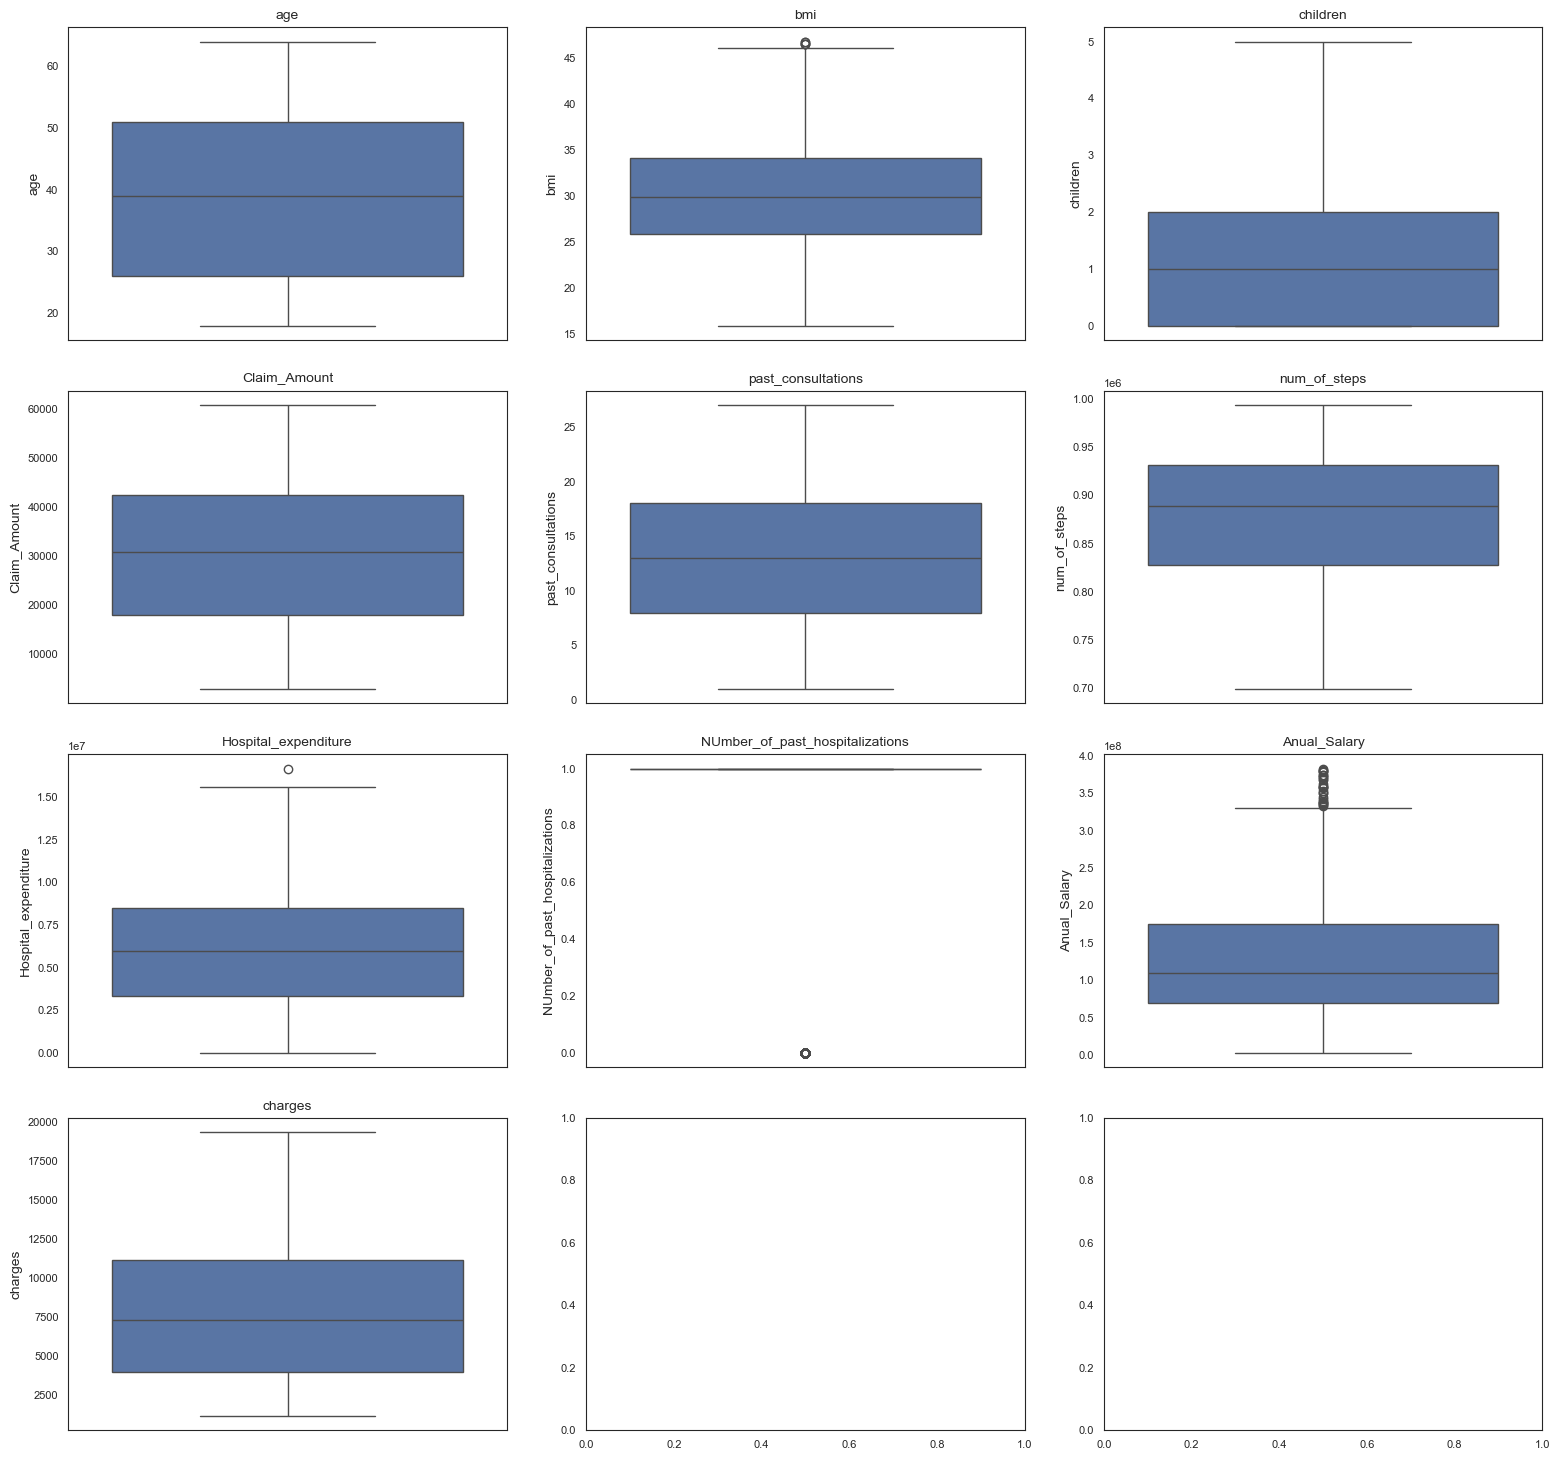

In [60]:

plt.rc('font', size=20)  
plt.rc('axes', titlesize=10)  
plt.rc('axes', labelsize=10)  
plt.rc('xtick', labelsize=8)  
plt.rc('ytick', labelsize=8)

numeric_cols=df.select_dtypes(include=['number']).columns
num_cols=len(numeric_cols)

ncols=3
nrows=(num_cols+ncols-1)//ncols

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(nrows*4,ncols*5))
axes=axes.flatten()

for ax,col in zip(axes,numeric_cols):
    sns.boxplot(y=df[col],ax=ax)
    ax.set_title(col)


plt.tight_layout()

In [61]:
df.head(2)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066


#### Data Preprocessing

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['sex']=le.fit_transform(df['sex']) 
df['smoker']=le.fit_transform(df['smoker']) 
df['region']=le.fit_transform(df['region'])
df.head(3)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,2,1135.9407


<Axes: >

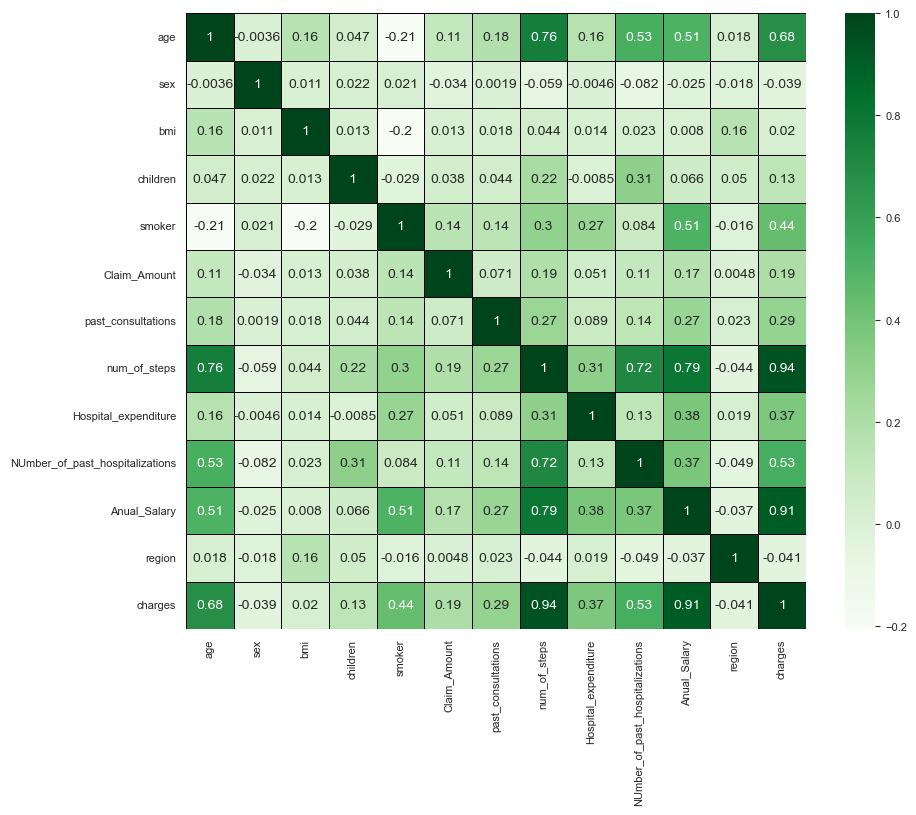

In [90]:
plt.rc('font', size=10)  
plt.rc('axes', titlesize=10)  
plt.rc('axes', labelsize=10)  
plt.rc('xtick', labelsize=8)  
plt.rc('ytick', labelsize=8)

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens',linewidths=0.5, linecolor='black')

In [64]:
imp_cols=['num_of_steps','NUmber_of_past_hospitalizations','age','Anual_Salary']
imp_cols

['num_of_steps', 'NUmber_of_past_hospitalizations', 'age', 'Anual_Salary']

In [65]:
#selecting the independent and dependent cols
X=df[imp_cols]
y=df['charges']

#### Model Training

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=35)

In [67]:
X_train

,num_of_steps,NUmber_of_past_hospitalizations,age,Anual_Salary
506,883360.0,1.0,40.0,1.040243e+08
289,831898.0,1.0,22.0,5.570944e+07
450,870001.0,1.0,37.0,7.626051e+07
191,787584.0,1.0,25.0,2.332156e+07
1016,993140.0,1.0,32.0,3.428884e+08
...,...,...,...,...
1007,960330.0,1.0,26.0,2.944865e+08
43,741355.0,0.0,19.0,1.777187e+07
999,953289.0,1.0,19.0,3.029514e+08
291,831363.0,1.0,28.0,1.129066e+08


In [68]:
y_train

506      7077.18940
289      4296.27120
450      6313.75900
191      3021.80915
1016    17496.30600
           ...     
1007    17043.34140
43       1646.42970
999     16450.89470
291      4337.73520
757     10796.35025
Name: charges, Length: 788, dtype: float64

In [69]:
X_test

,num_of_steps,NUmber_of_past_hospitalizations,age,Anual_Salary
981,962029.0,1.0,62.0,3.199317e+08
570,899773.0,1.0,42.0,1.266904e+08
222,829348.0,1.0,26.0,7.345664e+07
658,921688.0,1.0,47.0,1.362800e+08
338,844230.0,1.0,30.0,1.168626e+08
...,...,...,...,...
537,891626.0,1.0,44.0,1.201369e+08
201,797127.0,1.0,28.0,2.200409e+07
839,939343.0,1.0,18.0,1.613619e+08
640,917642.0,1.0,47.0,1.572821e+08


In [70]:
y_test

981    15019.76005
570     8017.06115
222     3392.36520
658     9225.25640
338     4753.63680
          ...     
537     7419.47790
201     3172.01800
839    11884.04858
640     8930.93455
695     9778.34720
Name: charges, Length: 198, dtype: float64

#### Model Fitting

In [71]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [72]:
predict=model.predict(X_test)
predict

array([15381.2263046 ,  8664.37736191,  4170.85958931,  9930.52991614,
        5726.78198104,  2866.51910893,  6600.85905592,  6293.10001046,
       14332.57544125,  7580.76018497, 11921.21547311, 16863.51021573,
        2714.15864632,  3474.84291257,  2233.14021764, 11761.94495937,
        4358.29300434, 14925.18597761, 12643.28585782,  7155.01038297,
        5415.89432043,  5564.04339135,  9907.60999394, 11052.52986864,
        2660.47802254, 13396.2274325 ,  8808.86843154,  5719.06427632,
       11429.25116861, 12679.5722995 , 12682.06937728,  8140.03173737,
       10505.61019593, 11935.76418819,  4550.50491924,  9537.58998293,
        9848.09981268,  6709.54056477,  5855.11977842, 10430.03678095,
       12254.40205916,  6538.31440153,  7094.38346914, 12515.16586163,
        3843.32478711,  5876.77815844,  5210.04523309,  5107.7885095 ,
       13532.0579696 , 11846.71238963, 11611.10501535,   664.22936848,
        7173.09144558, 14286.55861657,  6718.80249484, 11996.07152548,
      

#### Evaluation

In [73]:

check_data=pd.DataFrame({'Actual_data':y_test,'Predicted_data':predict})
check_data

,Actual_data,Predicted_data
981,15019.76005,15381.226305
570,8017.06115,8664.377362
222,3392.36520,4170.859589
658,9225.25640,9930.529916
338,4753.63680,5726.781981
...,...,...
537,7419.47790,8121.960366
201,3172.01800,1565.406997
839,11884.04858,11408.735722
640,8930.93455,10124.279119


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted values')

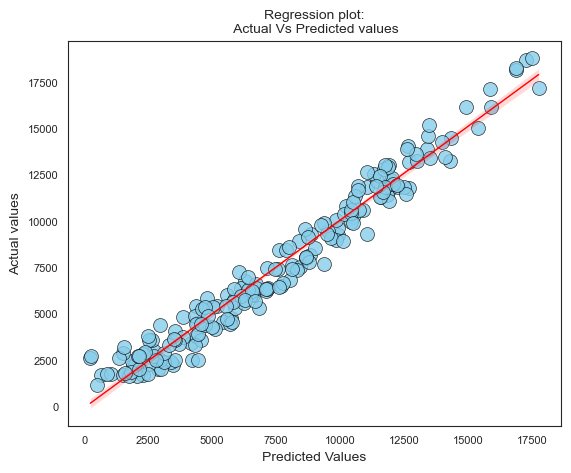

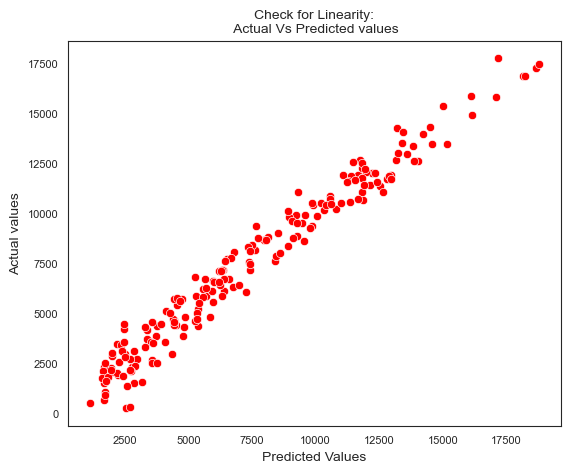

In [88]:
f = plt.figure(figsize=(14,5))
ax1 = f.add_subplot(121)

sns.regplot(
    x=predict, y=y_test,
    scatter_kws={
        "s": 100,              
        "color": "skyblue",     
        "edgecolor": "black",   
        "linewidths": 0.5         
    },
    line_kws={"color": "red", "linewidth": 1}  ,
ax=ax1 )
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')

f = plt.figure(figsize=(14,5))
ax2 = f.add_subplot(121)
sns.scatterplot(x=y_test,y=predict,ax=ax2,color='r')

plt.xlabel('Predicted Values')
plt.ylabel('Actual values')

ax1.set_title('Regression plot:\n Actual Vs Predicted values')
ax2.set_title('Check for Linearity:\n Actual Vs Predicted values')

#### Evaluation of the model

In [91]:
from sklearn.metrics import *

rmse=np.sqrt(mean_squared_error(y_test,predict))
print('The Root Mean Square Error(RMSE) is :',rmse)

The Root Mean Square Error(RMSE) is : 815.3597199347669


In [92]:
R_square=r2_score(y_test,predict)*100
print('R square obtain for scikit learn library is :',R_square)

R square obtain for scikit learn library is : 96.42974326372148
